## <font color="Blue">Phishing-URL Detection Model using Deep Learning algorithm - ConvXGB </font>

<b>GOAL:</b> This study employs new deep learning algorithm named "ConvXGB" to the field of cybersecurity in detecting phishing URL.</br>
<b>Author :</b> Saravanan Muthuramalingam </br>
<b>Purpose of this notebook :</b> This Notebook handles the following tasks,
    <li> Understanding the datasets </li>
    <li> Data Cleaning and Formating </li>
    <li> Inferential Statistics </li>
    <li> Data Pre-processing </li>
    


In [ ]:
# import all required python libraries
#-------------------------------------#
# Statistics Libraries
import numpy as np

# Dataset related Libraires
import pandas as pd 
import csv

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# URL Parsing Libraries
import urllib.parse
from urllib.parse import urlparse
from urllib.parse import urlsplit
from urlpath import URL

# OS and regular expression Libraries
import re
import glob
import os

# Image processing related Libraries
from PIL import Image
import cv2
#import skimage.measure
#import imghdr

# Image validation related Libraries
#from difPy import dif
#from sklearn.preprocessing import OneHotEncoder


#### <font color="blue"> 1. Understanding the datasets </font>

Publicly available Mendeley Phishing dataset is considered for this study, which can be downloaded from https://data.mendeley.com/datasets/n96ncsr5g4.</br>
    <li> Mendeley Provided Index.sql is converted to Phishing_dataset.csv as depcited below.</li>
    <li> Phishing_dataset.csv have featureset name 'website' containing reference file name.</li>
    <li> The folder name "dataset" contains actual html files which is refered in 'website' featureset of Phishing_dataset.csv</li>
    <li> These html extension files are converted as PNG extension files using python selenium libraries and stored in folder name 'converted_images'.</li>

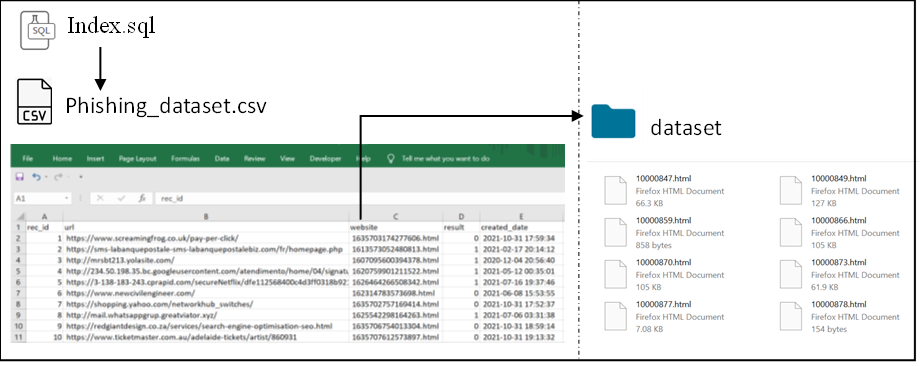

In [ ]:
# loading the raw-dataset to pandas dataframe
Phishing_url_df = pd.read_csv('phishing_dataset.csv', encoding='unicode_escape')

In [ ]:
# Reading the top rows of dataset
Phishing_url_df.head()

In [ ]:
# Viewing the features in the raw dataset
Phishing_url_df.columns

In [ ]:
# Calculating the total row-count of raw dataset
Phishing_url_df['url'].size

In [ ]:
# Calculating the total row-count along with column count of raw dataset
Phishing_url_df.shape

In [ ]:
# Understanding the datatype of each features
Phishing_url_df.info()

Apart from 'rec_id' and 'url' numerical featureset, we have three categorical dataset namely 'url' , 'website' and 'created_date'

In [ ]:
# Checking for any missing values in the dataset features
Phishing_url_df.isnull().sum()

#### <font color='blue'>2. Data Cleaning / Formatting</font> 

In [ ]:
# created_date - is Webpage downloaded date
Phishing_url_df['created_date']

In [ ]:
Phishing_url_df.shape

In [ ]:
# Removing unwanted featureset
Phishing_url_df = Phishing_url_df.drop('created_date', axis=1)

#striping the white space in feature 'url'
Phishing_url_df['url'] = Phishing_url_df['url'].str.replace(" ", "")

In [ ]:
#removing the duplicates
Phishing_url_df = Phishing_url_df[~Phishing_url_df["url"].duplicated()]

In [ ]:
Phishing_url_df.shape

#### <font color="blue"> 6. Data Pre-processing </font>

In [ ]:
# Folder 'Converted_images' contains all transformed image datasets.
# Creating a new dataframe named 'converted_image_list' and storing all individual file names od image data residing- 
  # -under 'converted_images' folder.

glob.glob(r"C:\Users\msara\Desktop\dataset\converted_images\*.*")
globlet = glob.glob(r"C:\Users\msara\Desktop\dataset\converted_images\*.*")
Columns = ['Path']
converted_images_list = pd.DataFrame(globlet)
converted_images_list.rename=['file_Path']

#Map the Path to the columns
converted_images_list.columns = ['Path']

#Extract the filename to seperate column
converted_images_list['File_name'] = converted_images_list['Path'].apply(lambda x: os.path.basename(x))
converted_images_list['File_name_without_ext'] = converted_images_list['File_name'].apply(lambda x: x.replace('.PNG',""))

#changing the featureset datatype
converted_images_list['File_name_without_ext'] = converted_images_list['File_name_without_ext'].astype('int32')

#matching the converted image file with csv
preprocess_1_df = pd.merge(Phishing_url_df,converted_images_list, left_on='rec_id', right_on='File_name_without_ext')

In [ ]:
# List of filenames of respective transformed image data - column name 'File_name' is appeneded.
preprocess_1_df.shape

In [ ]:
#Reading the top rows of the dataframe
preprocess_1_df.columns

In [ ]:
#Function to remove the image which has no data or text in it.
def remove_complete_white_image(img):
    image = cv2.imread("C:\\Users\\msara\\Desktop\\dataset\\converted_images\\"+img, 0)
    image = cv2.bitwise_not(image)

    if cv2.countNonZero(image) == 0:
        print( img, "Image is white")
        return True
    else:
        print(img, "Black region is there")
        return False

In [ ]:
#testing the remove_complete_white_image
remove_complete_white_image(r'C:\Users\msara\Desktop\dataset\converted_images\22893.PNG')

In [ ]:
#applying the remove_complete_white_image function to the dataframe.
preprocess_1_df['All_white_img'] = preprocess_1_df['File_name'].apply(lambda x: remove_complete_white_image(x))

In [ ]:
# verifying the dataframe
preprocess_1_df.head()

In [ ]:
#filter only the records in which the data is present
preprocess_1_df[preprocess_1_df['All_white_img'] == True]

In [ ]:
#cross checking the white backgrounded image
Image.open(r'C:\Users\msara\Desktop\dataset\converted_images\856.PNG')

In [ ]:
#cross checking the valid image
Image.open(r'C:\Users\msara\Desktop\dataset\converted_images\1.PNG')

In [ ]:
#Filtering out the white backgrounded images from the dataset
preprocess_1_df = preprocess_1_df[preprocess_1_df['All_white_img'] == False]

In [ ]:
# Convert to Pixel and storing in CSV file named 'phishing_data_preprocessed.csv'
for dirname, _, filenames in os.walk(r'C:\Users\msara\Desktop\dataset\converted_images\*.*'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
IMG_DIR = 'C:\\Users\\msara\\Desktop\\dataset\\converted_images\\'
print(IMG_DIR)

for img in os.listdir(IMG_DIR):
    print(type(img.replace(".PNG", "")))
    #print(type(np.array(img.replace(".PNG", ""))))
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)
    
    img_pil = Image.fromarray(img_array)
    # 3 for RGB - test
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    img_array = (img_28x28.flatten())
    img_array = np.append(np.array(int(img.replace(".PNG", ""))), img_array) 
    img_array  = img_array.reshape(-1,1).T
   
    print(img_array.shape)
    print(np.append(img[0:2], img_array))
    print(type(img_array))
    print(img_array.shape)
    with open('phishing_data_preprocessed_L1.csv', 'ab') as f:
        
        np.savetxt(f, img_array, delimiter=",")


In [ ]:
# load the train1.csv file to new dataframe
preprocess_2_df = pd.read_csv('phishing_data_preprocessed_L1.csv', header=None)

# setting the columns names with prefix pixel
preprocess_2_df.columns = [ 'pixel' + str(i + 1) for i in range(len(preprocess_2_df.columns))]

In [ ]:
#reading the new dataset
preprocess_2_df.head()

In [ ]:
# Setting the column name for file name
preprocess_2_df = preprocess_2_df.rename(columns = {'pixel1': "Finame"})

#drop duplicate rows if any
preprocess_2_df = preprocess_2_df.drop_duplicates()

In [ ]:
# viewing the shape of new dataframe train_df
preprocess_2_df.shape

In [ ]:
# Converting the Filename data type as string for manipulation
preprocess_2_df['Finame'] = preprocess_2_df['Finame'].astype('str')

# mapping the filename with postfix PNG so that the column data gets full filename
preprocess_2_df['Finame'] = preprocess_2_df['Finame'].apply(lambda x: x.split('.')[0])
preprocess_2_df['Finame'] = preprocess_2_df['Finame'].apply(lambda x: x+".PNG")

#Map these two dataframe to one 
preprocess_df = pd.merge(preprocess_1_df,preprocess_2_df, left_on='File_name', right_on='Finame')

#removing unwanted features
preprocess_df = preprocess_df.drop(['url','File_name','File_name_without_ext','Path','website', 'rec_id', 'Finame', 'All_white_img' ], axis=1)


In [ ]:
preprocess_df.head()

In [ ]:
preprocess_df.describe()

In [ ]:
#preprocess_df written to csv file
preprocess_df.to_csv('preprocessed_data.csv')